## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df = combined_mouse_data
df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
output=combined_mouse_data.loc[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID']
output


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_id= combined_mouse_data.loc[combined_mouse_data['Mouse ID']=='g989']
dup_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.g
clean_df= combined_mouse_data.loc[combined_mouse_data['Mouse ID']!='g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

unique_mice = clean_df['Mouse ID'].nunique()
unique_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_drug = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_drug = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var_drug = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_drug = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem_drug = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_df= pd.DataFrame({'Mean':mean_drug,'Median':median_drug,'Variance':var_drug, 'Standard Deviation': standard_drug,
                         
    'SEM': sem_drug})
summary_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line
summary2 = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:>

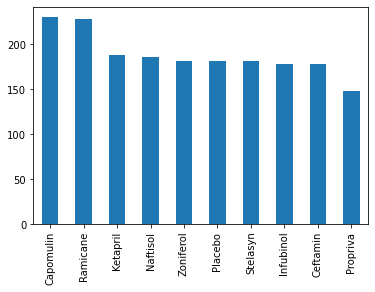

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_df= clean_df['Drug Regimen'].value_counts()
total_df.plot(kind='bar')



In [10]:
#print the total drug regimen for the data frame
total_df

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

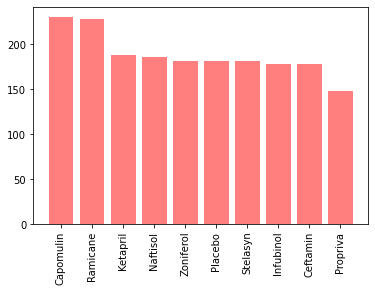

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(total_df.index.values,total_df.values, color='r', alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mice = clean_df.groupby(['Mouse ID','Sex'])
#Create a dataframe for summing up the mice gender
sum_it_up = gender_mice.sum()
sum_it_up.head()

,,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,Sex,,,,,
a203,Female,200,230,225,563.127077,11
a251,Female,210,250,225,552.370946,8
a262,Female,170,290,225,586.116306,23
a275,Female,200,280,225,527.709651,12
a366,Female,112,203,105,382.479341,1


In [13]:
#Create a data frame that breaks out the gender types of the mice along with their percentage
df3 = pd.DataFrame(df.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts())
# From taking those totals we must divde into the Sex values to find the percentage
df3['Percentage']= round(df3['Sex']/df3['Sex'].sum()*100)
df3.head()

,Sex,Percentage
Male,125,50.0
Female,124,50.0


array([<AxesSubplot:ylabel='Percentage'>], dtype=object)

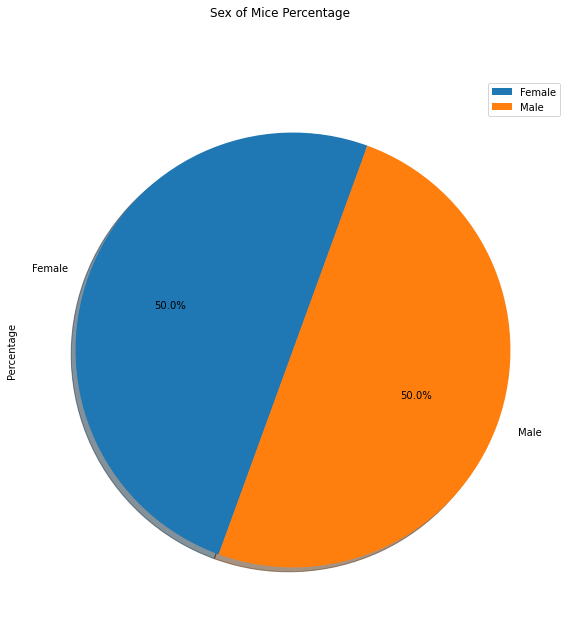

In [14]:
#Create the pie graph splitting Male to Female Mice using pandas
mice_labels= 'Female', 'Male'
df3.groupby(['Sex']).sum().plot(kind='pie', subplots=True, labels = mice_labels,shadow = True,startangle=70,title=('Sex of Mice Percentage'),
figsize=(15,10), autopct='%1.1f%%')




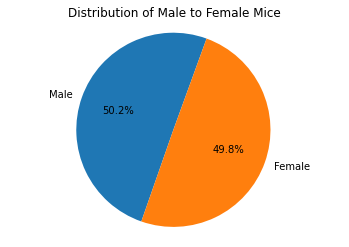

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



gen_data = [125,124]
mice_labels2 = 'Male', 'Female'
plt.pie(gen_data,labels=mice_labels2,autopct='%1.1f%%',startangle=70)
plt.title('Distribution of Male to Female Mice')
plt.axis('equal')
plt.show()



## Quartiles, Outliers and Boxplots

In [16]:
clean_df.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
timepoint= clean_df.groupby('Mouse ID').max()['Timepoint']
timepoint=timepoint.reset_index()

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(timepoint,clean_df,on= ['Mouse ID','Timepoint'])
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

tumor_list = []
for x in treatments: 
    drug_vol = merge_df.loc[merge_df['Drug Regimen']==x]['Tumor Volume (mm3)']
    tumor_list.append(drug_vol)
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = drug_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers= drug_vol.loc[(drug_vol< lower_bound)|(drug_vol> upper_bound) ]
   
    print (x,outliers)


    

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

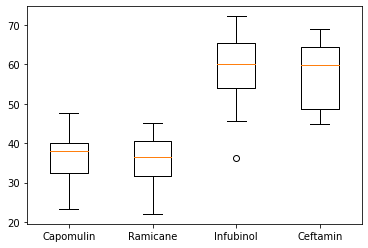

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_list,labels = treatments)
plt.show

## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tumor_time = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
tumor_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


<function matplotlib.pyplot.show(close=None, block=None)>

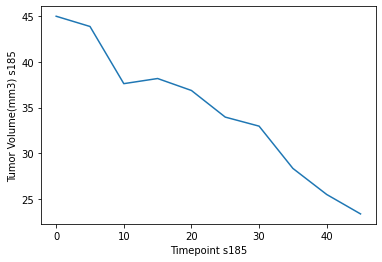

In [21]:
#Show the line plot below

s185 = tumor_time.loc[tumor_time['Mouse ID']=='s185']

xvalue = s185['Timepoint']
yvalue = s185['Tumor Volume (mm3)']
plt.xlabel('Timepoint s185')
plt.ylabel('Tumor Volume(mm3) s185')
plt.plot(xvalue,yvalue)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

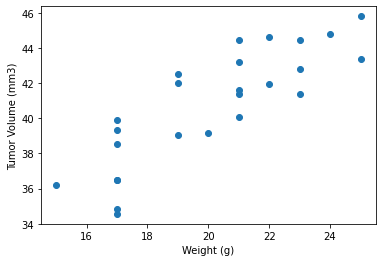

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor = tumor_time.groupby('Mouse ID').mean()
plt.scatter(avg_tumor['Weight (g)'],avg_tumor['Tumor Volume (mm3)'] )
x_values = avg_tumor['Weight (g)']
y_values = avg_tumor['Tumor Volume (mm3)']
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show

## Correlation and Regression

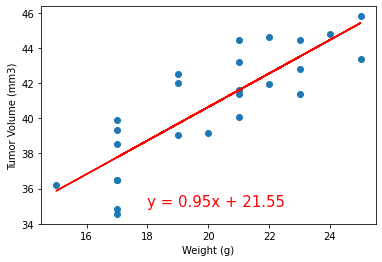

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = avg_tumor['Weight (g)']
y_values = avg_tumor['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,35),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()